## 1.Problem Statement

1.The objective of this project is to develop a machine learning model and deploy it as a user-friendly web application that predicts the resale prices of flats in Singapore.
 
2.This predictive model will be based on historical data of resale flat transactions, and it aims to assist both potential buyers and sellers in estimating the resale value of a flat.

## 2.1.Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle

## 2.2.Data Collection

In [3]:
df1=pd.read_csv('ResaleFlatPricesBasedonApprovalDate1990-1999.csv')
df2=pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000-2012.csv')
df3=pd.read_csv('ResaleFlatPricesBasedonRegistrationDate2012-2014.csv')
df4=pd.read_csv('ResaleFlatPricesBasedonRegistrationDate2015-2016.csv')
df5=pd.read_csv('ResaleFlatPricesBasedonRegistrationDate2017.csv')

In [4]:
df_Final=pd.concat([df1,df2])
df_Final=pd.concat([df_Final,df3])
df_Final=pd.concat([df_Final,df4])
df_Final=pd.concat([df_Final,df5])

In [5]:
df=df_Final.copy()

In [84]:
# df.to_csv('Final_report.csv')

## 2.3.Data Checks to Perform

### 1.Displaying the First Five record oF the Dataset

In [8]:
print(df.head())

     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            31.0        IMPROVED                 1977        9000.0  
1            31.0        IMPROVED                 1977        6000.0  
2            31.0        IMPROVED                 1977        8000.0  
3            31.0        IMPROVED                 1977        6000.0  
4            73.0  NEW GENERATION                 1976       47200.0  


### 2. Dataset Rows and Column Counts

In [9]:
print("Total No. oF Rows in the Dataset:",df.shape[0])
print("Total No. oF Columns in the Dataset:",df.shape[1])

Total No. oF Rows in the Dataset: 931709
Total No. oF Columns in the Dataset: 10


### 3. Columns name oF the Dataset

In [10]:
print("Columns oF the Given Dataset:",df.columns)

Columns oF the Given Dataset: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')


### 4.Total no. oF missing values in each Column

In [11]:
for Col in df.columns:
    print("Total No. oF Missing Values in the {} Column:{}".format(Col,df[Col].isnull().sum()))

Total No. oF Missing Values in the month Column:0
Total No. oF Missing Values in the town Column:0
Total No. oF Missing Values in the flat_type Column:0
Total No. oF Missing Values in the block Column:0
Total No. oF Missing Values in the street_name Column:0
Total No. oF Missing Values in the storey_range Column:0
Total No. oF Missing Values in the floor_area_sqm Column:0
Total No. oF Missing Values in the flat_model Column:0
Total No. oF Missing Values in the lease_commence_date Column:0
Total No. oF Missing Values in the resale_price Column:0


### 5.Statistical Data oF the Dataset

In [12]:
print("Statistical details oF the Dataset:")
print(df.describe().T)

Statistical details oF the Dataset:
                        count           mean            std     min       25%  \
floor_area_sqm       931709.0      95.688108      25.817817    28.0      73.0   
lease_commence_date  931709.0    1988.324782      10.712541  1966.0    1981.0   
resale_price         931709.0  322199.366464  171798.348413  5000.0  194000.0   

                          50%       75%        max  
floor_area_sqm           93.0     113.0      366.7  
lease_commence_date    1986.0    1996.0     2020.0  
resale_price         298000.0  420000.0  1588000.0  


### 6.Datatype oF each Column in the dataset

In [13]:
print("Datatypes oF the Columns in the Dataset:")
print(df.dtypes)

Datatypes oF the Columns in the Dataset:
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object


### 7.Total No. oF Unique Value in Each Column in the Dataset

In [14]:
for Col in df.columns:
    print("Total No. oF Unique Values in the {} Column: {}".format(Col,df[Col].nunique()))

Total No. oF Unique Values in the month Column: 415
Total No. oF Unique Values in the town Column: 27
Total No. oF Unique Values in the flat_type Column: 8
Total No. oF Unique Values in the block Column: 2712
Total No. oF Unique Values in the street_name Column: 584
Total No. oF Unique Values in the storey_range Column: 25
Total No. oF Unique Values in the floor_area_sqm Column: 213
Total No. oF Unique Values in the flat_model Column: 34
Total No. oF Unique Values in the lease_commence_date Column: 55
Total No. oF Unique Values in the resale_price Column: 9582


### 8. Quantitative and Qualitative Columns oF the Dataset

In [15]:
numerical_Cols=df.select_dtypes(exclude='O').columns
categorical_Cols=df.select_dtypes(include='O').columns
print("Numerical Columns oF the Dataset:",numerical_Cols)
print("Categorical Columns oF the Dataset:",categorical_Cols)

Numerical Columns oF the Dataset: Index(['floor_area_sqm', 'lease_commence_date', 'resale_price'], dtype='object')
Categorical Columns oF the Dataset: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model'],
      dtype='object')


### 9.Duplicates in the Dataset

In [16]:
print("Total No. oF duplicates in the Dataset:",df.duplicated().sum())

Total No. oF duplicates in the Dataset: 1972


### 10. Unique Values oF Each Column

In [17]:
for Col in df.columns:
    print("Unique Values oF the {} Column:{}".format(Col,df[Col].unique()))
    print("=============================================")

Unique Values oF the month Column:['1990-01' '1990-02' '1990-03' '1990-04' '1990-05' '1990-06' '1990-07'
 '1990-08' '1990-09' '1990-10' '1990-11' '1990-12' '1991-01' '1991-02'
 '1991-03' '1991-04' '1991-05' '1991-06' '1991-07' '1991-08' '1991-09'
 '1991-10' '1991-11' '1991-12' '1992-01' '1992-02' '1992-03' '1992-04'
 '1992-05' '1992-06' '1992-07' '1992-08' '1992-09' '1992-10' '1992-11'
 '1992-12' '1993-01' '1993-02' '1993-03' '1993-04' '1993-05' '1993-06'
 '1993-07' '1993-08' '1993-09' '1993-10' '1993-11' '1993-12' '1994-01'
 '1994-02' '1994-03' '1994-04' '1994-05' '1994-06' '1994-07' '1994-08'
 '1994-09' '1994-10' '1994-11' '1994-12' '1995-01' '1995-02' '1995-03'
 '1995-04' '1995-05' '1995-06' '1995-07' '1995-08' '1995-09' '1995-10'
 '1995-11' '1995-12' '1996-01' '1996-02' '1996-03' '1996-04' '1996-05'
 '1996-06' '1996-07' '1996-08' '1996-09' '1996-10' '1996-11' '1996-12'
 '1997-01' '1997-02' '1997-03' '1997-04' '1997-05' '1997-06' '1997-07'
 '1997-08' '1997-09' '1997-10' '1997-11' '1

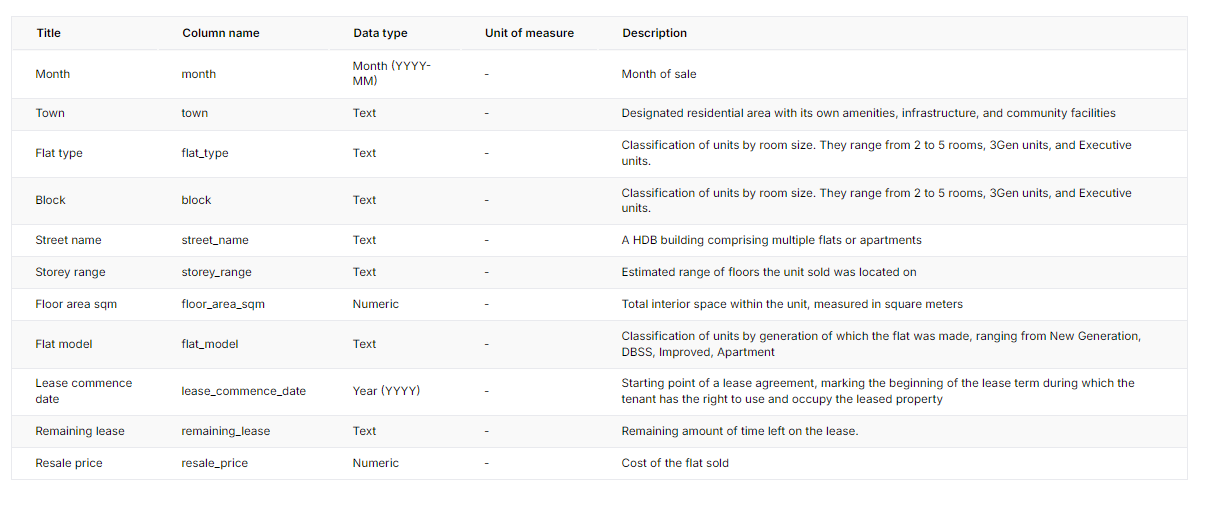

## 3.EDA

In [18]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [19]:
print(df.shape)

(931709, 10)


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [23]:
#split the year in the month column
df[['Sale_year','Sale_month']]=df['month'].str.split('-',expand=True)
df['block'] = df['block'].str.split(r'(\D)', expand=True)[0].astype('int64')

In [24]:
#changing the following columns into numeric
df['Sale_month']=pd.to_numeric(df['Sale_month'])
df['Sale_year']=pd.to_numeric(df['Sale_year'])

In [25]:
print(df['Sale_month'].unique())
print(df['Sale_year'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024]


In [26]:
df.town.value_counts()

town
TAMPINES           80179
YISHUN             70240
JURONG WEST        66836
BEDOK              66704
WOODLANDS          65708
ANG MO KIO         52123
HOUGANG            50906
BUKIT BATOK        44633
CHOA CHU KANG      38493
BUKIT MERAH        34458
PASIR RIS          33264
SENGKANG           32748
TOA PAYOH          31581
QUEENSTOWN         28820
GEYLANG            28238
CLEMENTI           28068
BUKIT PANJANG      27768
KALLANG/WHAMPOA    27290
JURONG EAST        24820
SERANGOON          22875
BISHAN             21316
PUNGGOL            20908
SEMBAWANG          13965
MARINE PARADE       8036
CENTRAL AREA        7168
BUKIT TIMAH         2529
LIM CHU KANG          63
Name: count, dtype: int64

In [27]:
df['flat_type'].value_counts()

flat_type
4 ROOM              353722
3 ROOM              296137
5 ROOM              196244
EXECUTIVE            69887
2 ROOM               11929
1 ROOM                1274
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [28]:
df['flat_type']=df['flat_type'].replace('MULTI GENERATION','MULTI-GENERATION')

In [29]:
df['flat_type'].value_counts()

flat_type
4 ROOM              353722
3 ROOM              296137
5 ROOM              196244
EXECUTIVE            69887
2 ROOM               11929
1 ROOM                1274
MULTI-GENERATION       544
Name: count, dtype: int64

In [30]:
df['flat_model'].value_counts()

flat_model
Model A                   196232
Improved                  169001
New Generation            110400
NEW GENERATION             78646
IMPROVED                   73296
MODEL A                    70234
Premium Apartment          47147
Simplified                 34397
Apartment                  25715
Standard                   25227
SIMPLIFIED                 23211
Maisonette                 17547
STANDARD                   17323
MAISONETTE                 12195
Model A2                   10174
APARTMENT                   9887
DBSS                        3348
Adjoined flat               1257
Model A-Maisonette          1099
MODEL A-MAISONETTE           981
Terrace                      448
Type S1                      441
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      217
2-room                       134
Premium Apartment Loft       112
Premium Maisonette            86
Improved-Maisonette           83

In [31]:
for i in df.flat_model.unique():
    df['flat_model']=df['flat_model'].replace(i,i.upper())

In [32]:
df['flat_model']=df['flat_model'].apply(lambda x:x.capitalize())

In [33]:
df['flat_model'].value_counts()

flat_model
Model a                   266466
Improved                  242297
New generation            189046
Simplified                 57608
Premium apartment          47153
Standard                   42550
Apartment                  35602
Maisonette                 29742
Model a2                   10174
Dbss                        3348
Model a-maisonette          2080
Adjoined flat               1257
Terrace                      695
Multi generation             544
Type s1                      441
Type s2                      217
2-room                       155
Improved-maisonette          127
Premium apartment loft       112
Premium maisonette            86
3gen                          37
Name: count, dtype: int64

In [34]:
import statistics
def get_median(x):
    Split_List=x.split('TO')
    Float_List=[float(i) for i in Split_List]
    median=statistics.median(Float_List)
    return median
df['Storey Range']=df['storey_range'].apply(lambda x:get_median(x))

In [35]:
df['Storey Range'].value_counts()

Storey Range
5.0     233096
8.0     213145
2.0     186906
11.0    179274
14.0     62354
17.0     24336
20.0     11508
23.0      7576
26.0      3478
3.0       2696
29.0      1668
13.0      1259
32.0       643
35.0       587
38.0       520
18.0       265
41.0       249
44.0        66
47.0        53
28.0        39
50.0        17
33.0         2
Name: count, dtype: int64

In [37]:
df.dtypes

month                   object
town                    object
flat_type               object
block                    int64
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
Sale_year                int64
Sale_month               int64
Storey Range           float64
dtype: object

In [38]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'Sale_year', 'Sale_month', 'Storey Range'],
      dtype='object')

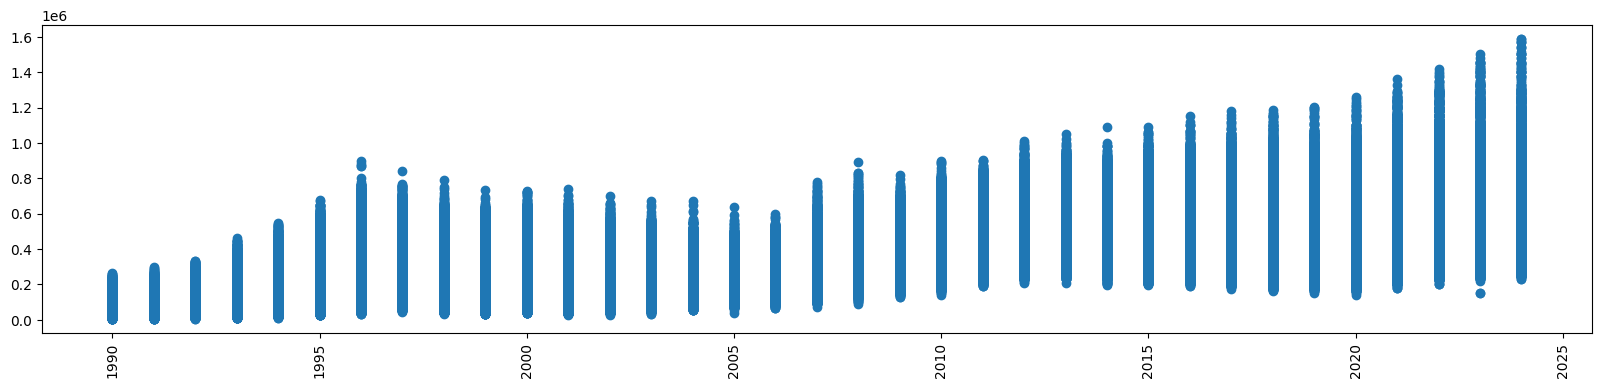

In [39]:
# year_Vice_Price=df.groupby('month')['resale_price'].sum().reset_index()
plt.figure(figsize=(20,4))
plt.scatter(df['Sale_year'],df['resale_price'])
plt.xticks(rotation=90)
plt.show()

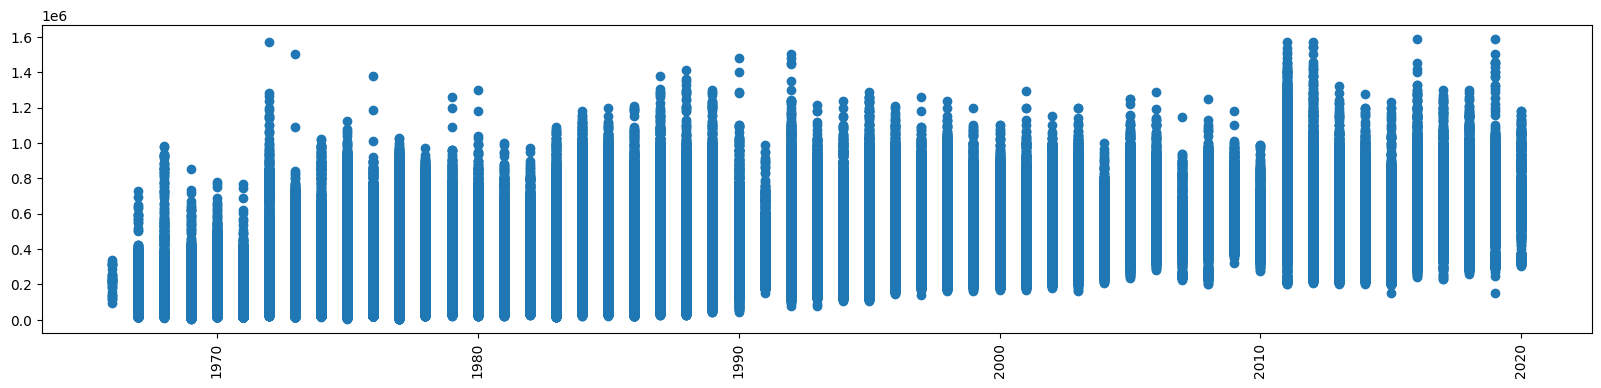

In [40]:
plt.figure(figsize=(20,4))
plt.scatter(df['lease_commence_date'],df['resale_price'])
plt.xticks(rotation=90)
plt.show()

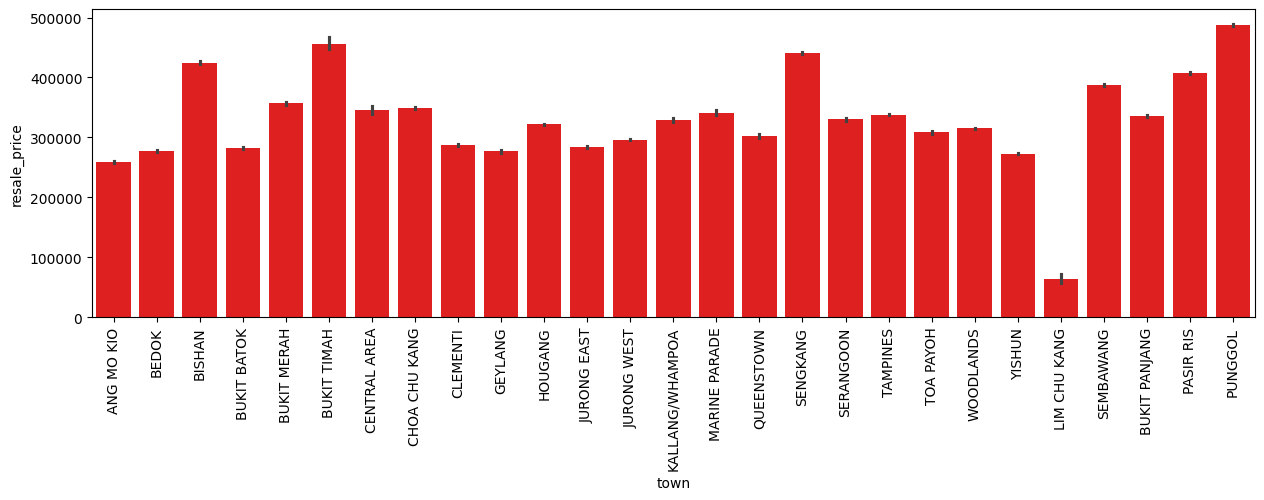

In [41]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='town',y='resale_price',color='red')
plt.xticks(rotation=90)
plt.show()

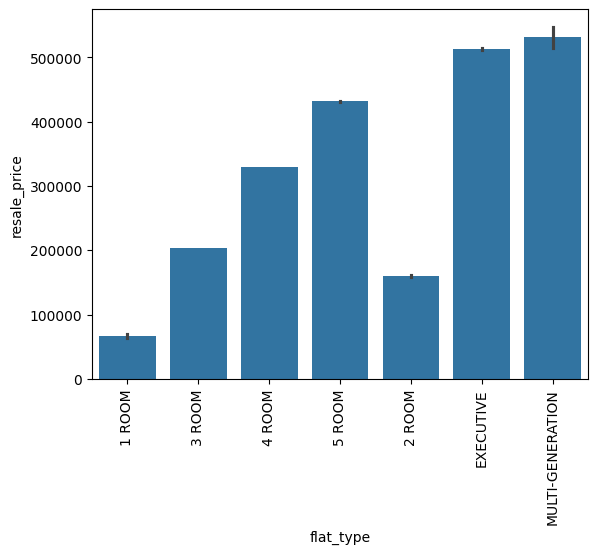

In [42]:
sns.barplot(data=df,x='flat_type',y='resale_price')
plt.xticks(rotation=90)
plt.show()

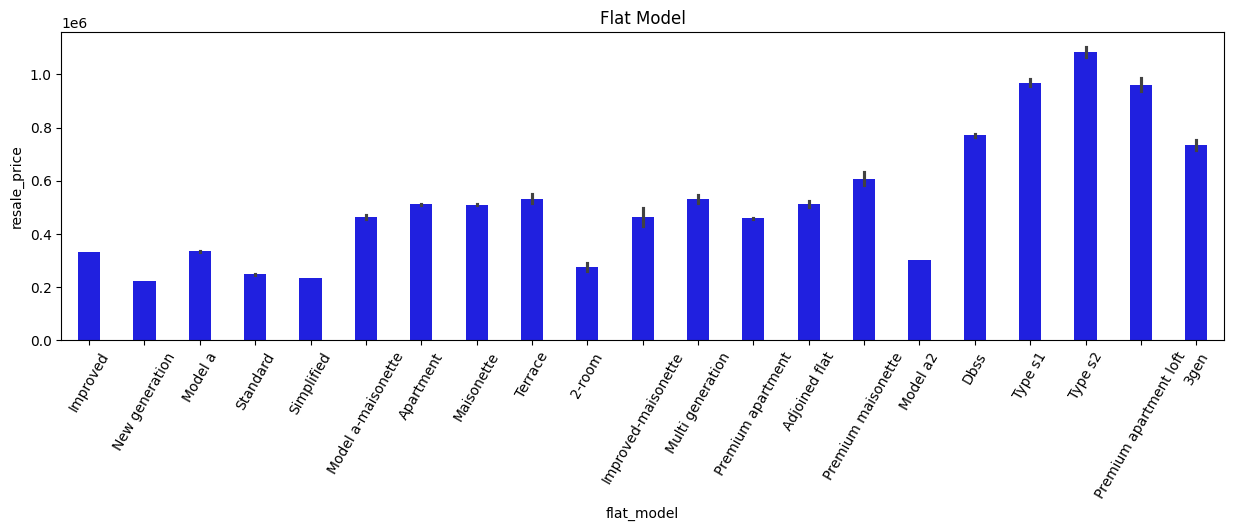

In [43]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='flat_model',y='resale_price',color='blue',width=0.4)
plt.xticks(rotation=60)
plt.title('Flat Model')
plt.show()

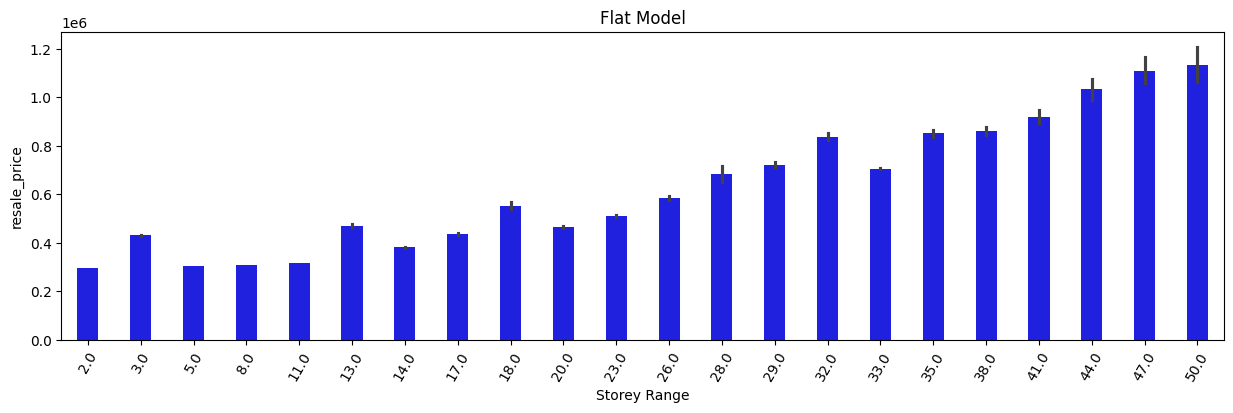

In [44]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='Storey Range',y='resale_price',color='blue',width=0.4)
plt.xticks(rotation=60)
plt.title('Flat Model')
plt.show()

In [45]:
df_Copy=df.copy()

In [46]:
def Num_Plot(df,Col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=Col,bins=20)
    plt.title(f"Histplot for {Col} Column:")
    plt.subplot(1,2,2)
    sns.boxplot(data=df,x=Col)
    plt.title(f"BoxPlot for {Col} Column:")

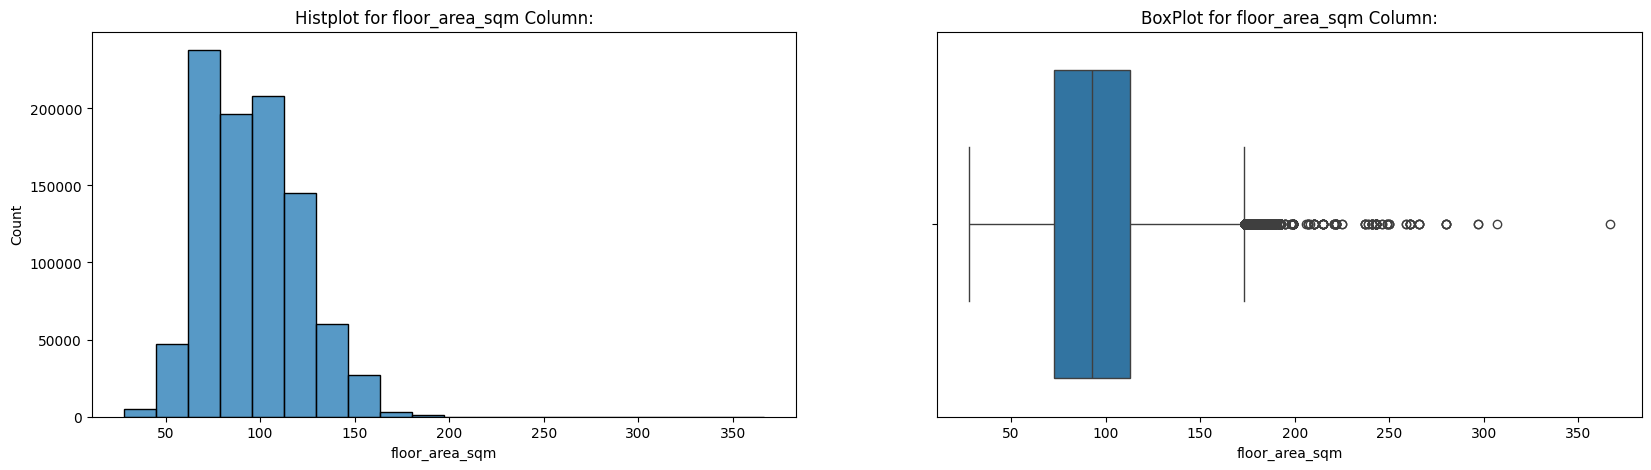

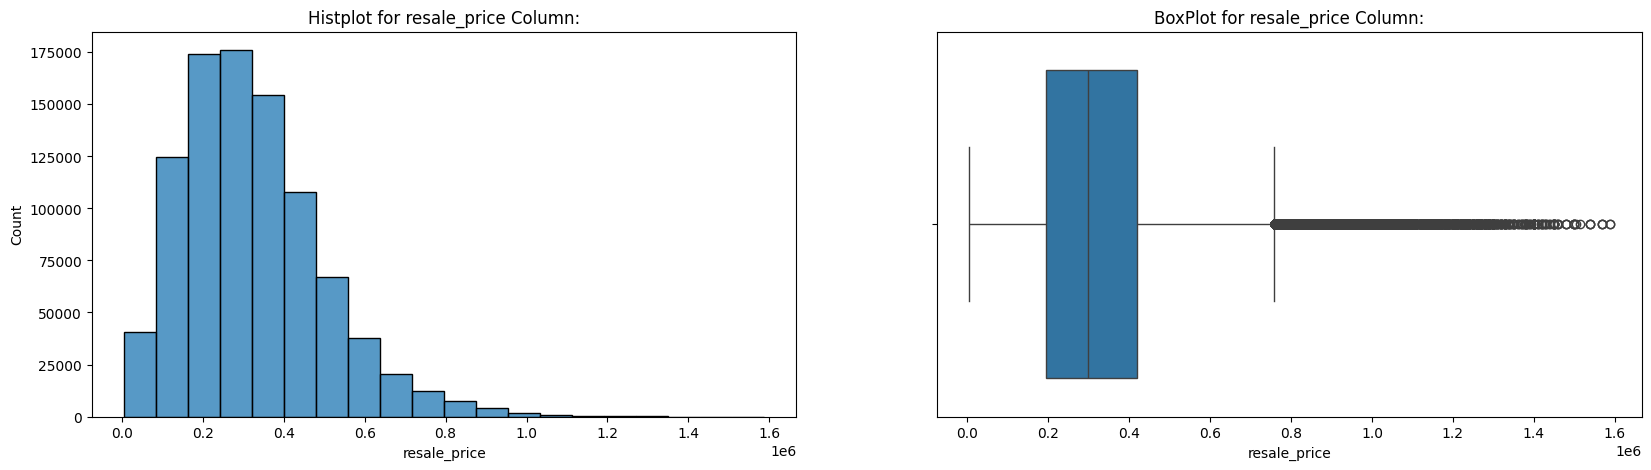

In [47]:
num_Col=['floor_area_sqm','resale_price']
for Col in num_Col:
    Num_Plot(df_Copy,Col)

In [82]:
num_Col=['floor_area_sqm','resale_price','block']
for Col in num_Col:
    print('Column Name:',Col)
    print('Mean:',df_Copy[Col].mean())
    print('Median',df_Copy[Col].mean())
    print("*************")

Column Name: floor_area_sqm
Mean: 95.68441580791131
Median 95.68441580791131
*************
Column Name: resale_price
Mean: 319952.6570781632
Median 319952.6570781632
*************
Column Name: block
Mean: 348.90452353730143
Median 348.90452353730143
*************


### There is No Skewness in this Continous value columns

In [49]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    dict_VALUE={'IQR':iqr,'UPPER_TH':upper_threshold,'LOWER_TH':lower_threshold}
    return dict_VALUE


print(outlier(df_Copy,'floor_area_sqm'))
print(outlier(df_Copy,'resale_price'))

{'IQR': 40.0, 'UPPER_TH': 173.0, 'LOWER_TH': 13.0}
{'IQR': 226000.0, 'UPPER_TH': 759000.0, 'LOWER_TH': -145000.0}


In [50]:
print(df_Copy.head())

     month        town flat_type  block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM    309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM    309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM    309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM    309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM    216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        Improved                 1977        9000.0   
1            31.0        Improved                 1977        6000.0   
2            31.0        Improved                 1977        8000.0   
3            31.0        Improved                 1977        6000.0   
4            73.0  New generation                 1976       47200.0   

   Sale_year  Sale_month  Storey Range  
0       1990           1          11.0  
1       1990           1           5.0  

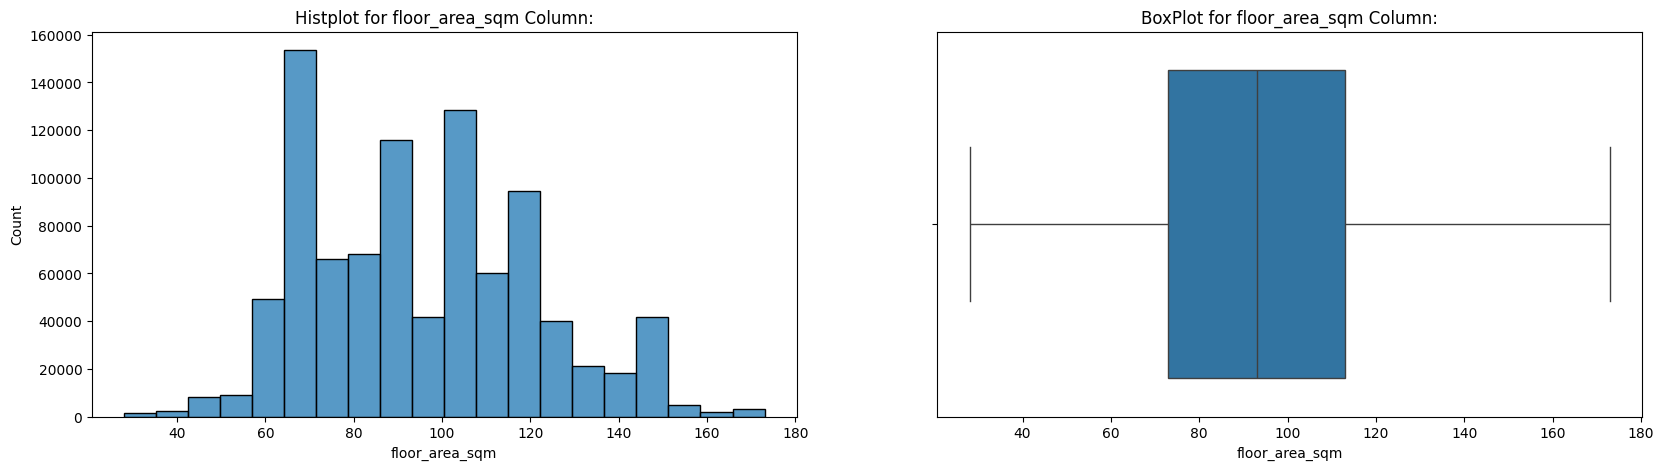

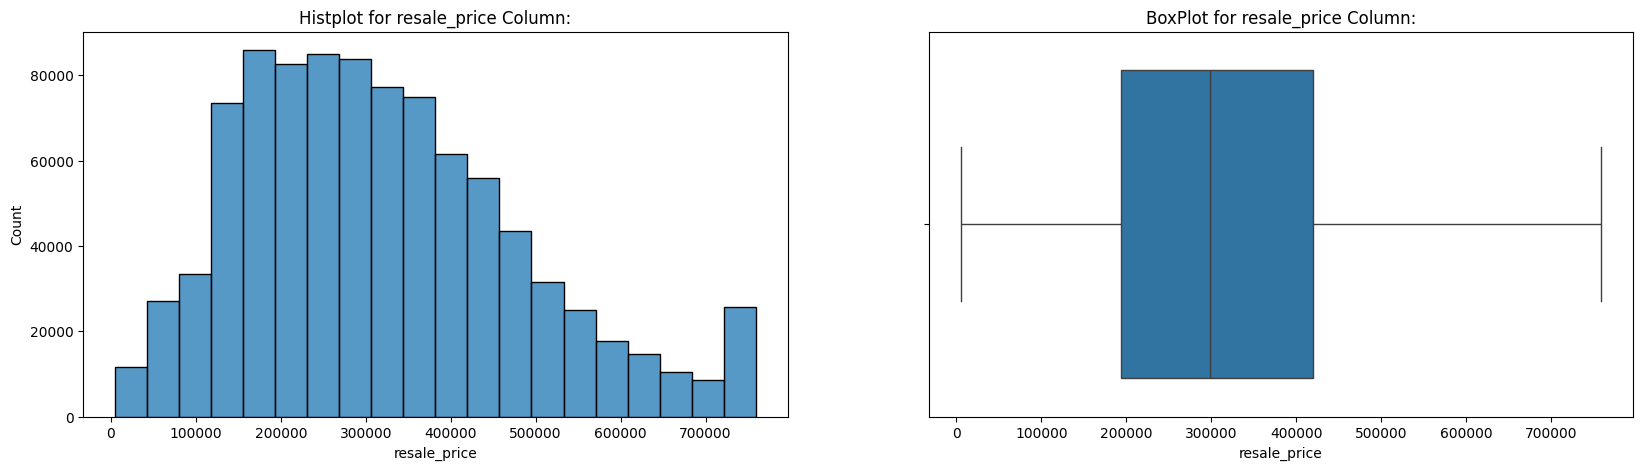

In [51]:
num_Col=['floor_area_sqm','resale_price']
for Col in num_Col:
    Num_Plot(df_Copy,Col)

In [52]:
df_Copy.dtypes

month                   object
town                    object
flat_type               object
block                    int64
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
Sale_year                int64
Sale_month               int64
Storey Range           float64
dtype: object

In [53]:
df_Copy.drop(['month','street_name','storey_range'],axis=1,inplace=True)

In [54]:
print(df_Copy.head())

         town flat_type  block  floor_area_sqm      flat_model  \
0  ANG MO KIO    1 ROOM    309            31.0        Improved   
1  ANG MO KIO    1 ROOM    309            31.0        Improved   
2  ANG MO KIO    1 ROOM    309            31.0        Improved   
3  ANG MO KIO    1 ROOM    309            31.0        Improved   
4  ANG MO KIO    3 ROOM    216            73.0  New generation   

   lease_commence_date  resale_price  Sale_year  Sale_month  Storey Range  
0                 1977        9000.0       1990           1          11.0  
1                 1977        6000.0       1990           1           5.0  
2                 1977        8000.0       1990           1          11.0  
3                 1977        6000.0       1990           1           8.0  
4                 1976       47200.0       1990           1           5.0  


In [55]:
print(df_Copy.shape)

(929737, 10)


In [56]:
from sklearn.preprocessing import LabelEncoder

Encoder=LabelEncoder()
df_Copy['Town_EN']=Encoder.fit_transform(df_Copy['town'])
df_Copy['Flat_model_EN']=Encoder.fit_transform(df_Copy['flat_model'])
df_Copy['Flat_Type_EN']=Encoder.fit_transform(df_Copy['flat_type'])

In [57]:
dict_town=dict(zip(df_Copy['town'],df_Copy['Town_EN']))
dict_Flat_model=dict(zip(df_Copy['flat_model'],df_Copy['Flat_model_EN']))
dict_Flat_type=dict(zip(df_Copy['flat_type'],df_Copy['Flat_Type_EN']))

In [58]:
print(dict_town)
print(dict_Flat_model)
print(dict_Flat_type)

{'ANG MO KIO': 0, 'BEDOK': 1, 'BISHAN': 2, 'BUKIT BATOK': 3, 'BUKIT MERAH': 4, 'BUKIT TIMAH': 6, 'CENTRAL AREA': 7, 'CHOA CHU KANG': 8, 'CLEMENTI': 9, 'GEYLANG': 10, 'HOUGANG': 11, 'JURONG EAST': 12, 'JURONG WEST': 13, 'KALLANG/WHAMPOA': 14, 'MARINE PARADE': 16, 'QUEENSTOWN': 19, 'SENGKANG': 21, 'SERANGOON': 22, 'TAMPINES': 23, 'TOA PAYOH': 24, 'WOODLANDS': 25, 'YISHUN': 26, 'LIM CHU KANG': 15, 'SEMBAWANG': 20, 'BUKIT PANJANG': 5, 'PASIR RIS': 17, 'PUNGGOL': 18}
{'Improved': 5, 'New generation': 12, 'Model a': 8, 'Standard': 17, 'Simplified': 16, 'Model a-maisonette': 9, 'Apartment': 3, 'Maisonette': 7, 'Terrace': 18, '2-room': 0, 'Improved-maisonette': 6, 'Multi generation': 11, 'Premium apartment': 13, 'Adjoined flat': 2, 'Premium maisonette': 15, 'Model a2': 10, 'Dbss': 4, 'Type s1': 19, 'Type s2': 20, 'Premium apartment loft': 14, '3gen': 1}
{'1 ROOM': 0, '3 ROOM': 2, '4 ROOM': 3, '5 ROOM': 4, '2 ROOM': 1, 'EXECUTIVE': 5, 'MULTI-GENERATION': 6}


In [59]:
# with open('town.json','w') as File:
#     json.dump(dict_town,File)
# with open('Flat_type.json','w') as File:
#     json.dump(dict_Flat_type,File)
# with open('Flat_model.json','w') as File:
#     json.dump(dict_Flat_model,File)

In [60]:
df_Copy.drop(['town','flat_type','flat_model'],axis=1,inplace=True)

In [61]:
df_Copy.dtypes

block                    int64
floor_area_sqm         float64
lease_commence_date      int64
resale_price           float64
Sale_year                int64
Sale_month               int64
Storey Range           float64
Town_EN                  int32
Flat_model_EN            int32
Flat_Type_EN             int32
dtype: object

In [62]:
print(df_Copy.head())

   block  floor_area_sqm  lease_commence_date  resale_price  Sale_year  \
0    309            31.0                 1977        9000.0       1990   
1    309            31.0                 1977        6000.0       1990   
2    309            31.0                 1977        8000.0       1990   
3    309            31.0                 1977        6000.0       1990   
4    216            73.0                 1976       47200.0       1990   

   Sale_month  Storey Range  Town_EN  Flat_model_EN  Flat_Type_EN  
0           1          11.0        0              5             0  
1           1           5.0        0              5             0  
2           1          11.0        0              5             0  
3           1           8.0        0              5             0  
4           1           5.0        0             12             2  


## Feature Selection


In [63]:
df_Corr=df_Copy.corr()
df_Corr['resale_price']

block                  0.085753
floor_area_sqm         0.571360
lease_commence_date    0.545167
resale_price           1.000000
Sale_year              0.686236
Sale_month             0.005166
Storey Range           0.233344
Town_EN                0.063551
Flat_model_EN         -0.265584
Flat_Type_EN           0.597113
Name: resale_price, dtype: float64

<Axes: >

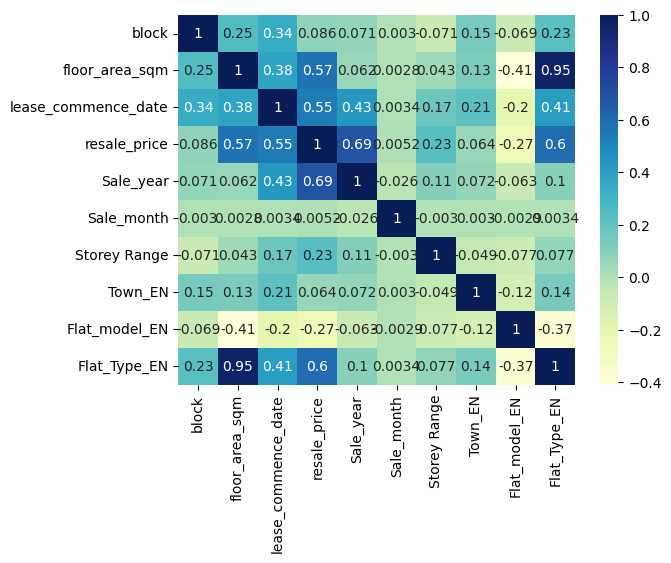

In [64]:
sns.heatmap(df_Corr,cmap='YlGnBu',annot=True)

## Model Training

In [80]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [67]:
X=df_Copy.drop('resale_price',axis=1)
y=df_Copy['resale_price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model1=LinearRegression()
model1.fit(X_train.values,y_train)
y_train_pred1=model1.predict(X_train.values)
y_test_pred1=model1.predict(X_test.values)
r2_Score_train=r2_score(y_train,y_train_pred1)
r2_Score_test=r2_score(y_test,y_test_pred1)
mse_train=mean_squared_error(y_train,y_train_pred1)
mse_test=mean_squared_error(y_test,y_test_pred1)


In [68]:
print(r2_Score_train)
print(r2_Score_test)
print(mse_train)
print(mse_test)

0.7912560565917259
0.7912497974227519
5630130763.237019
5610963922.4086275


In [69]:
model2=DecisionTreeRegressor()
model2.fit(X_train.values,y_train)

y_train_pred1=model2.predict(X_train.values)
y_test_pred1=model2.predict(X_test.values)


r2_Score_train=r2_score(y_train_pred1,y_train)
r2_Score_test=r2_score(y_test_pred1,y_test)


mse_train=mean_squared_error(y_train,y_train_pred1)
mse_test=mean_squared_error(y_test,y_test_pred1)

print(r2_Score_train)
print(r2_Score_test)
print(mse_train)
print(mse_test)

0.9998026972052839
0.9700621549130249
5320496.429082977
801546226.0584495


In [70]:
rmse = np.sqrt(mse_test)
target_range = np.max(y_test) - np.min(y_test)
percentage_accuracy = (1.0 - (rmse / target_range)) 
print(percentage_accuracy)

0.9624215665967909


## Hyperparameter Tuning

In [71]:
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# param_grid_r = {'max_depth': [2, 5, 10, 20],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf' : [1, 2, 4],
#               'max_features'     : ['sqrt', 'log2', None]}

# grid_search_r = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid_r, cv=5)
# grid_search_r.fit(x_train, y_train)
# print(grid_search_r.best_params_)

# print(grid_search_r.best_score_)

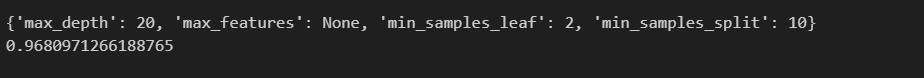

## Parameterized Model

In [72]:
x = df_Copy.drop('resale_price',axis=1)
y = df_Copy['resale_price']

x_train, x_test, y_train, y_test = train_test_split(x ,y,test_size=0.2,random_state=42)

model = DecisionTreeRegressor(max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10)
model.fit(x_train.values, y_train)
y_pred_train=model.predict(x_train.values)
y_pred_test = model.predict(x_test.values)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2_train=r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
metrics_r = {'R2_TRAIN': r2_train,
             'R2_TEST':r2_test,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r


{'R2_TRAIN': 0.9840610697126132,
 'R2_TEST': 0.9733195691136848,
 'Mean Squared Error': 717139113.1083282,
 'Root Mean Squared Error': 26779.4531891211}

In [73]:
# with open ('model.pkl','wb') as File:
#     pickle.dump(model,File)

## Model Prediction

In [74]:
user_data=np.array([[216,73.0,1976,1990,1,5.0,0,12,2]])
y_pred=model.predict(user_data)
print(y_pred)       #47200.0	

[47040.]


In [75]:
df_Copy.head()

,block,floor_area_sqm,lease_commence_date,resale_price,Sale_year,Sale_month,Storey Range,Town_EN,Flat_model_EN,Flat_Type_EN
0,309,31.0,1977,9000.0,1990,1,11.0,0,5,0
1,309,31.0,1977,6000.0,1990,1,5.0,0,5,0
2,309,31.0,1977,8000.0,1990,1,11.0,0,5,0
3,309,31.0,1977,6000.0,1990,1,8.0,0,5,0
4,216,73.0,1976,47200.0,1990,1,5.0,0,12,2
